In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.utils.multiclass import unique_labels
import pickle
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plotCM(y_true, y_pred, name = "Confusion Matrix"):
    labels = unique_labels(y_test)
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = labels, index = labels)
    sn.heatmap(table, annot = True, fmt = 'd', cmap = 'viridis')
    plt.gcf().axes[0].tick_params(colors = 'white')
    plt.gcf().axes[1].tick_params(colors = 'white')
    plt.title(name, color = 'white')
    plt.xlabel('Predicted Label', color = 'white')
    plt.ylabel('True Label', color = 'white')
    plt.gcf().set_size_inches(10,6)
    plt.show()

In [3]:
df_train = pd.read_csv("train dataset.csv")
df_test = pd.read_csv("test dataset.csv")

In [4]:
df_train.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [5]:
df_test.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [6]:
df_train.loc[449,'Gender'] = 'Male'

In [7]:
g_train = pd.get_dummies(df_train['Gender']).drop('Female', axis = 1)
g_test = pd.get_dummies(df_test['Gender']).drop('Female', axis = 1)
X = pd.concat([g_train, df_train.drop('Gender', axis = 1)], axis = 1)
y = pd.concat([g_test, df_test.drop('Gender', axis = 1)], axis = 1)

In [8]:
X.head()

,Male,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,1,17,7,4,7,3,2,extraverted
1,1,19,4,5,4,6,6,serious
2,0,18,7,6,4,5,5,dependable
3,0,22,5,6,7,4,3,extraverted
4,0,19,7,4,6,5,4,lively


In [9]:
y.head()

,Male,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,0,20,7,9,9,5,5,dependable
1,1,17,5,4,5,2,4,serious
2,0,25,5,5,7,2,4,serious
3,0,18,6,2,7,4,7,serious
4,0,19,2,4,7,1,3,responsible


In [10]:
X.dropna(inplace = True)
y.dropna(inplace = True)

In [11]:
X.to_csv('X.csv')
y.to_csv('y.csv')

In [12]:
X_train = X.drop('Personality (Class label)', axis = 1)
y_train = X['Personality (Class label)']
X_test = y.drop('Personality (class label)', axis = 1)
y_test = y['Personality (class label)']

In [13]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
knn = KNN()
svc = SVC()
xgb = XGBClassifier()

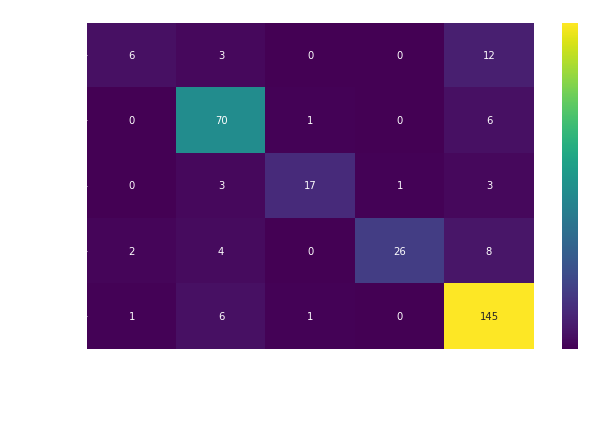

In [14]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
plotCM(y_test, lr_pred , 'Confusion Matrix for Logistic Regression')

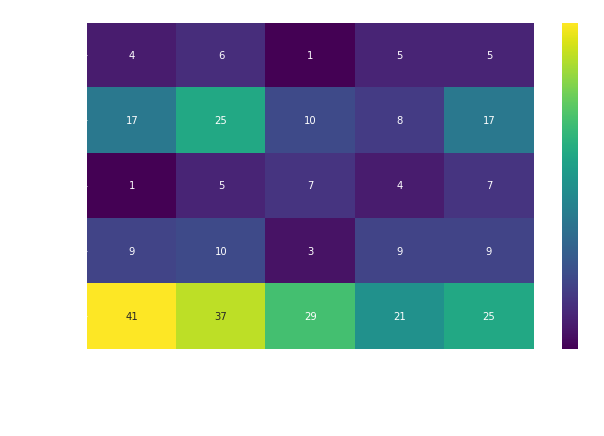

In [15]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
plotCM(y_test, knn_pred , 'Confusion Matrix for KNN')

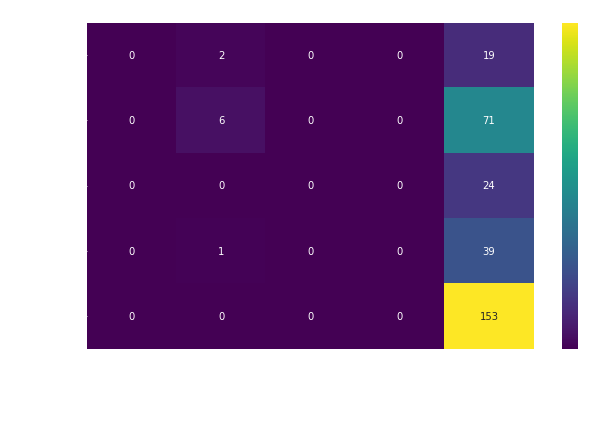

In [16]:
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
plotCM(y_test, svc_pred , 'Confusion Matrix for SVC')

C:\Users\nikhi\anaconda3\envs\deeplearning\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:16:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


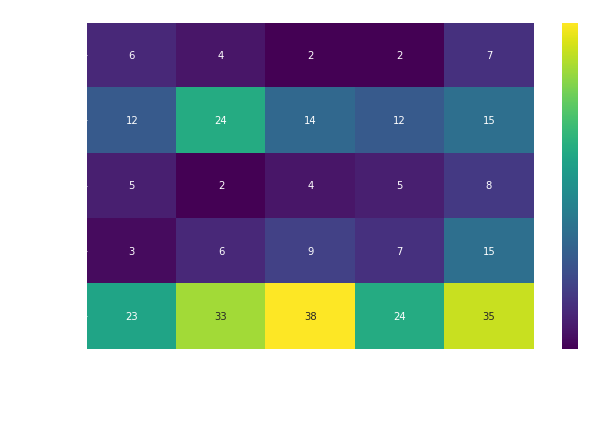

In [17]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
plotCM(y_test, xgb_pred , 'Confusion Matrix for XGBoost')

In [18]:
algos = ['Logistic Regression', 'KNN', 'SVC', 'XGBoost']
f1_scores = [f1_score(y_test, lr_pred, average='weighted'), f1_score(y_test, knn_pred, average='weighted'), f1_score(y_test, svc_pred, average='weighted'), f1_score(y_test, xgb_pred, average='weighted')]

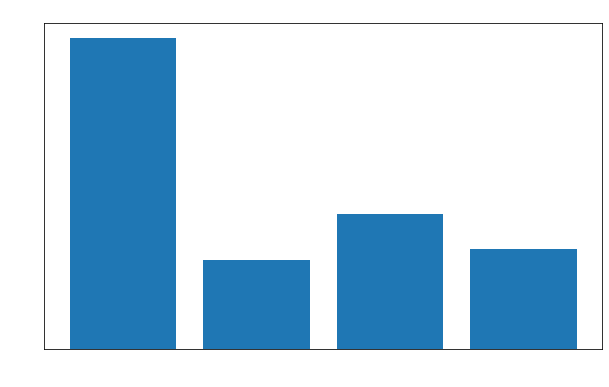

In [19]:
ypos = np.array([0,1,2,3])
plt.xticks(ypos, algos)
plt.bar(ypos, f1_scores)
plt.gcf().axes[0].tick_params(colors = 'white')
plt.title('F1 Scores vs Algos', color = 'white')
plt.xlabel('Algorithms', color = 'white')
plt.ylabel('F1 Scores', color = 'white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [20]:
with open('personality_prediction_lr', 'wb') as f:
    pickle.dump(lr, f)